In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

Covid_data = pd.read_csv('data.csv', header = 0)
Covid_data.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
1,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,UNK,8901064
3,2020-W53,AT,8901064.0,61425.0,0.0,5243,NaN,0,0,0,AT,ALL,COM,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064


In [8]:
Covid_data.describe()

,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Population
count,1.133880e+05,2.884900e+04,1.941800e+04,1.975160e+05,1430.000000,1.975160e+05,1.975160e+05,197516.000000,1.975160e+05
mean,1.691953e+06,5.495897e+04,3.368993e+03,4.165535e+03,0.406294,3.634379e+03,1.281769e+03,33.403679,1.827775e+07
std,6.202897e+06,2.410738e+05,5.810090e+04,3.884458e+04,3.226784,3.741218e+04,2.869299e+04,2252.618926,1.919271e+07
min,9.680000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,3.874700e+04
25%,9.687200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,5.525292e+06
50%,2.610410e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,5.525292e+06
75%,1.049057e+06,5.800000e+03,0.000000e+00,2.370000e+02,0.000000,7.800000e+01,0.000000e+00,0.000000,3.795814e+07
max,8.316671e+07,6.907398e+06,4.100000e+06,3.374073e+06,73.000000,3.066409e+06,3.197669e+06,429061.000000,8.316671e+07


In [9]:
Covid_data.isnull().sum()

YearWeekISO                 0
ReportingCountry            0
Denominator             84128
NumberDosesReceived    168667
NumberDosesExported    178098
FirstDose                   0
FirstDoseRefused       196086
SecondDose                  0
DoseAdditional1             0
UnknownDose                 0
Region                      0
TargetGroup                 0
Vaccine                     0
Population                  0
dtype: int64

In [11]:
Covid_data.shape

(197516, 14)

In [15]:
Covid_data = Covid_data.drop(columns=["NumberDosesReceived", "NumberDosesExported", "FirstDoseRefused"])

In [18]:
Covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Denominator,113388.0,1.691953e+06,6.202897e+06,968.0,96872.0,261041.0,1049057.0,83166711.0
FirstDose,197516.0,4.165535e+03,3.884458e+04,0.0,0.0,1.0,237.0,3374073.0
SecondDose,197516.0,3.634379e+03,3.741218e+04,0.0,0.0,0.0,78.0,3066409.0
DoseAdditional1,197516.0,1.281769e+03,2.869299e+04,0.0,0.0,0.0,0.0,3197669.0
UnknownDose,197516.0,3.340368e+01,2.252619e+03,0.0,0.0,0.0,0.0,429061.0
Population,197516.0,1.827775e+07,1.919271e+07,38747.0,5525292.0,5525292.0,37958138.0,83166711.0


In [21]:
Denominator_mean = Covid_data["Denominator"].mean
Covid_data_cleaned = Covid_data.copy()
Covid_data_cleaned["Denominator"] = Covid_data_cleaned["Denominator"].fillna(Denominator_mean)
Covid_data_cleaned.isnull().sum()

YearWeekISO         0
ReportingCountry    0
Denominator         0
FirstDose           0
SecondDose          0
DoseAdditional1     0
UnknownDose         0
Region              0
TargetGroup         0
Vaccine             0
Population          0
dtype: int64

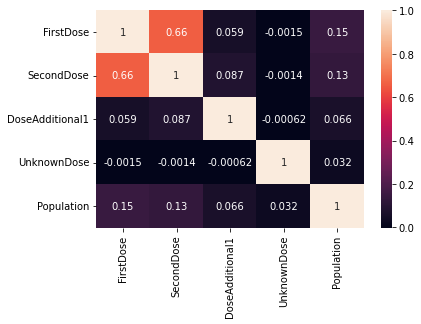

In [22]:
sea.heatmap(Covid_data_cleaned.corr(), annot = True )

In [23]:
Covid_data_cleaned.head()

,YearWeekISO,ReportingCountry,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,MOD,8901064
1,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,JANSS,8901064
2,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,UNK,8901064
3,2020-W53,AT,8901064.0,5243,0,0,0,AT,ALL,COM,8901064
4,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,AZ,8901064


In [29]:
Covid_data_cleaned["TargetGroup"].values()

array(['ALL', 'ALL', 'ALL', ..., 'Age80+', 'Age80+', 'Age80+'],
      dtype=object)

Text(0.5, 1.0, 'Date')

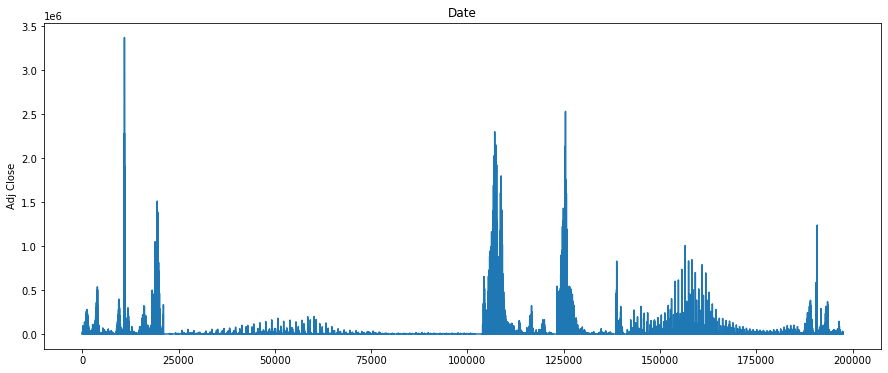

In [34]:
plt.figure(figsize=(15, 6))
Covid_data_cleaned['FirstDose'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Date")

In [53]:
Covid_data_plot = Covid_data_cleaned.copy()
Covid_data_plot = Covid_data_plot[~(Covid_data_plot.TargetGroup.isin(["1_age60+", "1_age<60", "age<18", "HCW", "LTCF"]))]
#Covid_data_plot = Covid_data_plot.drop(Covid_data_plot[Covid_data_plot.TargetGroup.isin(["1_age60+", "1_age<60", "age<18", "HCW", "LTCF"])].index)

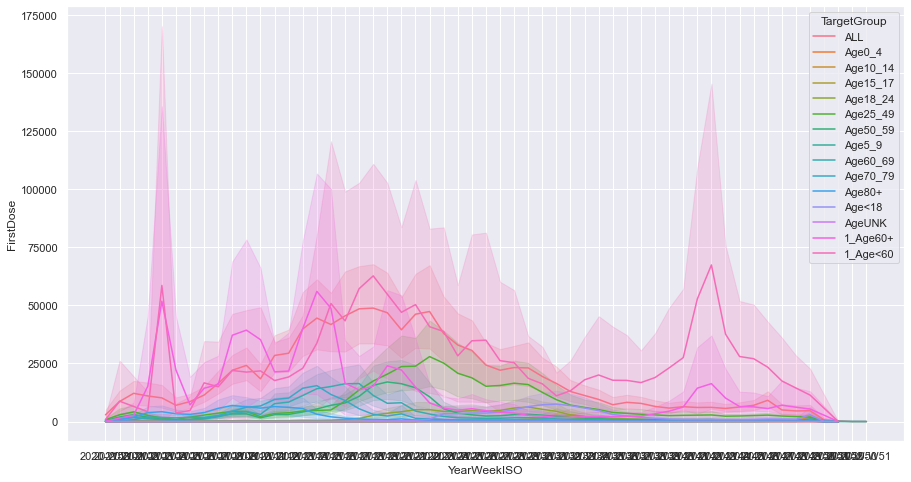

In [55]:
sea.set(rc = {'figure.figsize':(15,8)})
sea.lineplot(data=Covid_data_plot[~(Covid_data_plot.TargetGroup.isin(["1_age60+", "1_age<60", "age<18", "HCW", "LTCF"]))], hue='TargetGroup', x='YearWeekISO', y='FirstDose') 